<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Distribuciones_Discretas_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación y validación de distribuciones discretas

En este notebook trabajaremos con cinco distribuciones discretas:

- Bernoulli  
- Binomial  
- Geométrica  
- Poisson  
- Uniforme discreta  

Para cada una:

1. Recordaremos su definición y fórmula.
2. Indicaremos un uso típico en simulación.
3. Generaremos 100 datos "observados" (son los que tú vas a ir a levantar en campo para tú proyecto).
4. Generaremos 1000 datos "sintéticos" desde la distribución teórica.
5. Compararemos ambas muestras con:
   - Un gráfico (distplots superpuestos).
   - Una prueba de **Chi-cuadrado** para verificar si ambas muestras son consistentes entre sí.


# 1. Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, geom, poisson, randint, chisquare

rng = np.random.default_rng(123)

def chi2_gof_discreta(data, dist, titulo):
    """
    Prueba de bondad de ajuste Chi-cuadrado para una distribución discreta.
    - data: muestra observada (enteros)
    - dist: distribución de scipy.stats ya configurada (frozen), con pmf()
    - titulo: título para el gráfico
    """
    data = np.asarray(data, dtype=int)
    n = data.size

    # Categorías presentes en la muestra
    vals, obs_counts = np.unique(data, return_counts=True)

    # Probabilidades teóricas para esas mismas categorías
    pmf = dist.pmf(vals)

    # Si la suma de pmf en ese subconjunto no es 1 (por colas), renormalizamos
    pmf_sum = pmf.sum()
    if pmf_sum <= 0:
        raise ValueError("La pmf teórica sobre las categorías observadas es cero.")
    pmf = pmf / pmf_sum

    # Frecuencias esperadas
    exp_counts = pmf * n

    # Filtrar categorías con frecuencia esperada > 0 (evita problemas numéricos)
    mask = exp_counts > 0
    vals, obs_counts, exp_counts = vals[mask], obs_counts[mask], exp_counts[mask]

    # Gráfico: frecuencias relativas observadas vs esperadas
    width = 0.4
    plt.figure(figsize=(6,4))
    plt.bar(vals - width/2, obs_counts / n, width=width, label="Observada", alpha=0.8)
    plt.bar(vals + width/2, exp_counts / n, width=width, label="Esperada (teórica)", alpha=0.6)
    plt.xticks(vals)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia relativa")
    plt.title(titulo)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Prueba Chi-cuadrado
    chi2, p = chisquare(f_obs=obs_counts, f_exp=exp_counts)
    print(f"Chi-cuadrado: {chi2:.4f}  |  p-value: {p:.4f}")
    if p > 0.05:
        print("No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.\n")
    else:
        print("Se rechaza la hipótesis: hay diferencias significativas.\n")

## 1. Distribución Bernoulli

**Definición:** Modela un solo experimento con dos resultados posibles:  
éxito (1) con probabilidad $p$, fracaso (0) con probabilidad $1-p$.

$$
P(X=1) = p,\quad P(X=0) = 1-p
$$

**Uso en simulación:** Presencia/ausencia de un evento, clic/no clic, defecto/no defecto, etc.


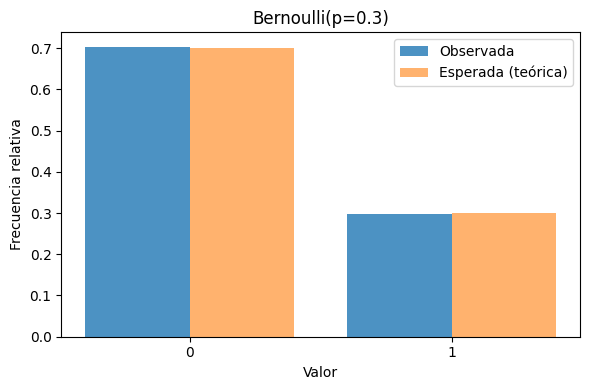

Chi-cuadrado: 0.0429  |  p-value: 0.8360
No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [2]:
# Bernoulli(p)
p = 0.3
data_bern = rng.binomial(n=1, p=p, size=1000)
dist_bern = bernoulli(p)
chi2_gof_discreta(data_bern, dist_bern, f"Bernoulli(p={p})")


## 2. Distribución Binomial

**Definición:** Cuenta el número de éxitos en \(n\) ensayos Bernoulli independientes,
cada uno con probabilidad de éxito $p$.

$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k},\quad k=0,1,\dots,n
$$

**Uso en simulación:** Número de piezas defectuosas en un lote, aciertos en un test,
clientes que compran entre los contactados, etc.


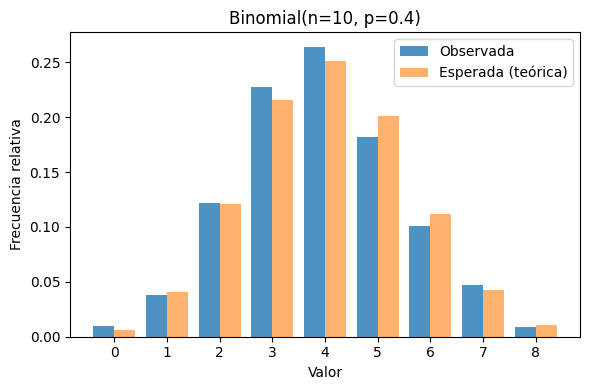

Chi-cuadrado: 7.5239  |  p-value: 0.4813
No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [3]:
# Binomial(n, p)
n, p = 10, 0.4
data_binom = rng.binomial(n=n, p=p, size=1000)
dist_binom = binom(n, p)
chi2_gof_discreta(data_binom, dist_binom, f"Binomial(n={n}, p={p})")

## 3. Distribución Geométrica

**Convención (SciPy):** Número de ensayos hasta el primer éxito (incluyendo el éxito), con probabilidad $p$.

$$
P(X=k) = (1-p)^{k-1} p,\quad k=1,2,3,\dots
$$

**Uso en simulación:** Número de intentos hasta lograr un evento: primer cliente que compra,
primer fallo, primer acierto, etc.


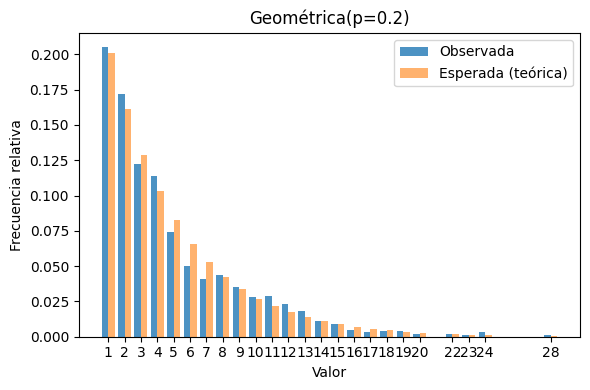

Chi-cuadrado: 21.2315  |  p-value: 0.5669
No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [4]:
# Geométrica(p) (SciPy: soporte k = 1, 2, 3, ...)
p = 0.2
data_geom = rng.geometric(p, size=1000)
dist_geom = geom(p)
chi2_gof_discreta(data_geom, dist_geom, f"Geométrica(p={p})")


## 4. Distribución Poisson

**Definición:** Modela el número de eventos que ocurren en un intervalo,
cuando estos suceden de forma independiente con tasa promedio $\lambda$.

$$
P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!},\quad k=0,1,2,\dots
$$

**Uso en simulación:** Llegadas por unidad de tiempo (clientes, llamadas, pedidos),
número de accidentes, errores, etc.


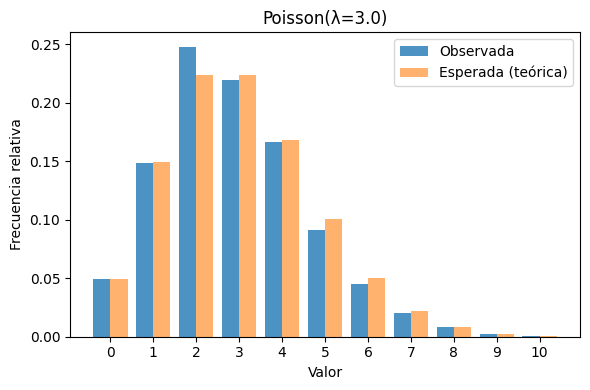

Chi-cuadrado: 4.5365  |  p-value: 0.9199
No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [5]:
# Poisson(λ)
lam = 3.0
data_pois = rng.poisson(lam=lam, size=1000)
dist_pois = poisson(mu=lam)
chi2_gof_discreta(data_pois, dist_pois, f"Poisson(λ={lam})")

## 5. Distribución Uniforme Discreta

**Definición:** Todos los valores enteros en $\{a, a+1, \dots, b\}$ tienen la misma probabilidad.

$
P(X=x) = \frac{1}{b-a+1},\quad x=a,\dots,b
$

**Uso en simulación:** Modelar elecciones equiprobables:
lanzamiento de un dado justo, selección aleatoria entre alternativas simétricas, etc.


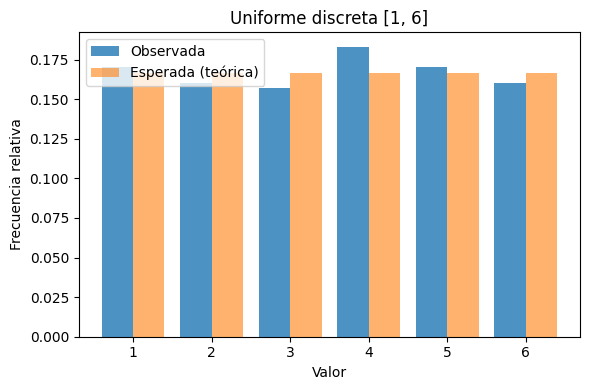

Chi-cuadrado: 2.8280  |  p-value: 0.7265
No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [6]:
# Uniforme discreta {a,...,b}
a, b = 1, 6
data_uni = rng.integers(a, b+1, size=1000)
dist_uni = randint(a, b+1)  # randint es uniforme discreta en [a, b)
chi2_gof_discreta(data_uni, dist_uni, f"Uniforme discreta [{a}, {b}]")

**1. Cual es la diferencia entre la implementación de Chi2 del libro y el laboratorio.**

La prueba Chi-cuadrado en el libro se desarrolla de forma manual ya que primero se dividen los datos en intervalos, luego se calcula la probabilidad sumando las probabilidades dentro de cada uno, y posteriormente se determina la frecuencia esperada procurando que sea, como mínimo 5 por intervalo. Con esa información se elabora una tabla completa que incluye las frecuencias observadas, las esperadas y el aporte de cada intervalo al estadístico Chi-cuadrado.

En el laboratorio con Python el proceso es completamente automático ya que se trabajan directamente los valores discretos sin necesidad de agruparlos, las probabilidades se calculan usando la PMF para cada valor, se descartan las categorías cuya frecuencia esperada es prácticamente nula y finalmente se aplica la función scipy.stats.chisquare para obtener el estadístico y el p-valor. Este enfoque busca ser práctico y eficiente para analizar datos reales sin tener que construir manualmente toda la tabla del procedimiento.

**2. Como se estiman los parámetros de la distribución?**

- Para la distribución **Bernoulli**, el parámetro p se obtiene dividiendo el número de éxitos entre el total de datos observados.

- Para la distribución **Binomial**, primero se establece un valor n (que representa la cantidad de ensayos) y luego el parámetro p se calcula dividiendo la media muestral entre ese valor n.

- Para la distribución **Geométrica**, el parámetro p se estima como el inverso del promedio de los datos observados.

- Para la distribución **Poisson**, el parámetro lambda corresponde al promedio de los datos; cuando este valor es mayor, los eventos tienden a aparecer con más frecuencia.

- Para la distribución **Uniforme**, los parámetros a y b representan los valores mínimo y máximo que puede tomar la variable aleatoria.

**3. Probar qué distribución sigue la siguiente muestra:**

4 5 3 5 5 4 3 2 4 3
4 6 4 3 5 2 2 3 3 4
4 4 3 3 3 2 2 3 2 3
3 4 5 2 3 4 3 3 5 3
2 5 3 4 4 1 4 5 4 5
7 2 4 4 2 4 1 5 4 4
5 5 5 2 4 4 5 4 4 1
6 4 6 6 2 4 4 2 2 2
3 3 2 5 3 5 1 3 2 4
1 2 5 2 3 1 5 3 2 5

**4. Probar qué distribución sigue la siguiente muestra:**

1 0 0 1 0 0 1 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 1 0 0 0 0 0 1 1
1 0 1 2 1 1 1 0 0 0
1 0 1 2 0 0 1 1 0 1
0 1 1 0 0 1 1 2 1 0
1 2 0 1 1 1 0 1 0 1
1 0 1 2 0 0 1 2 1 0
1 0 0 2 0 0 0 0 1 0
0 0 0 1 0 1 2 1 0 0